In [2]:
##Experiment 7:Ensemble Learning
##Level 1: Implement Ensemble Learning algorithms
such as Bagging,Pasting and Out-of Bag Evaluation.
##Level 2: Random Patches and Random Subspace Method.


SyntaxError: ignored

In [23]:
!pip install matplotlib-venn

In [24]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [18]:
!pip install cartopy
import cartopy

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cartopy



In [28]:
# Load winequality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

In [31]:
# Split data into training and testing sets
X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [32]:
# Train decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
# Print classification report for decision tree model
y_pred = dt.predict(X_test)
print("Decision Tree")
print(classification_report(y_test, y_pred))

Decision Tree
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320



In [34]:
# Train Bagging classifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [35]:
# Print classification report for Bagging classifier
y_pred = bagging.predict(X_test)
print("Bagging")
print(classification_report(y_test, y_pred))

Bagging
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.78      0.75       130
           6       0.63      0.68      0.66       132
           7       0.59      0.48      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Train Pasting classifier
pasting = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=100, bootstrap=False, random_state=42)
pasting.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=100, random_state=42)

In [37]:
# Print classification report for Pasting classifier
y_pred = pasting.predict(X_test)
print("Pasting")
print(classification_report(y_test, y_pred))

Pasting
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.66      0.65       130
           6       0.56      0.54      0.55       132
           7       0.53      0.55      0.54        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.29      0.29      0.29       320
weighted avg       0.56      0.56      0.56       320



In [38]:
# Evaluate Out-of-Bag score for Bagging classifier
bagging_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                n_estimators=100, oob_score=True,
                                random_state=42)
bagging_oob.fit(X_train, y_train)
oob_score = bagging_oob.oob_score_
print("Out-of-Bag Score")
print("OOB Score:", oob_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Out-of-Bag Score
OOB Score: 0.6942924159499609


In [42]:
# Plot confusion matrix for Bagging classifier
(bagging, X_test, y_test)
plt.show()

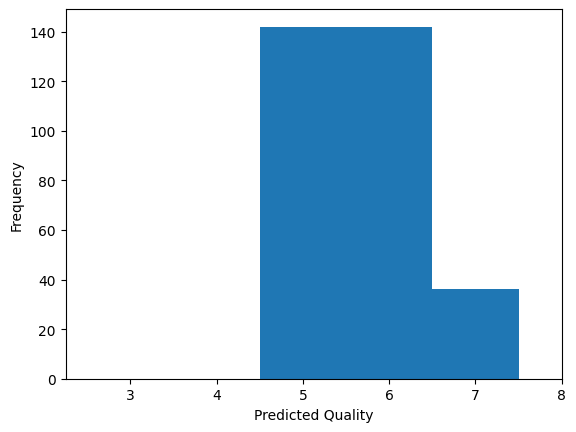

In [40]:
# Plot histogram of predicted quality values for Bagging classifier
y_pred = bagging.predict(X_test)
plt.hist(y_pred, bins=range(3, 9), align='left')
plt.xticks(range(3, 9))
plt.xlabel("Predicted Quality")
plt.ylabel("Frequency")
plt.show()